<a href="https://colab.research.google.com/github/Nato9-7/EDA_FundamentosML_RenatoDiaz/blob/main/EDA_FundamentosML_RenatoDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Manejo y análisis de datos en estructuras tipo DataFrame.
import numpy as np #Biblioteca para cálculos matemáticos y estadísticos.
import matplotlib.pyplot as plt #Creación de gráficos y visualizaciones.
from matplotlib import style #Estilos de gráficos.
import pandas as pd #Manejo y análisis de datos en estructuras tipo DataFrame.
import seaborn as sns #Extensión de matplotlib con diseños estadísticos mejorados.
import scipy.stats as stats #especializado en estadística y probabilidad.
import statsmodels.formula.api as sm

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf


# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",", encoding='latin-1')

Saving data.csv to data (1).csv


In [36]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Item
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85


In [37]:
df = df[df['Quantity'] >= 0]
print("Valor mínimo de Quantity después de filtrar:", df['Quantity'].min())

Valor mínimo de Quantity después de filtrar: 1


In [44]:
df = df[df['UnitPrice'] > 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Total_Item]
Index: []


Eliminación de filas con datos negativos en la columna quantities ya que podrían ser devoluciones. También se elimino los precios negativos o con cero ya que afectan a la media.

In [28]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
Total_Item,float64


#Identificación y descripción de las variables (categóricas y numéricas).

InvoiceNo	Categórica (numérica)	Nominal

StockCode	Categórica (numérica)	Nominal

Description	Categórica	Texto/Nominal

Quantity	Numérica	Entero discreto

InvoiceDate	Temporal	Fecha/Hora

UnitPrice	Numérica	Decimal continuo

CustomerID	Categórica (numérica)	Nominal

Country	Categórica	Nominal

Total (implícito)	Numérica	Decimal continuo

#tendecia central y dispersion sobre las tablas quantity y unitprice

In [38]:
df['Quantity'].describe()

,Quantity
count,531285.000000
mean,10.655262
std,156.830323
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [43]:
df['UnitPrice'].describe()

,UnitPrice
count,530050.000000
mean,3.662956
std,12.766693
min,0.001000
25%,1.250000
50%,2.080000
75%,4.130000
max,988.000000


La cantidad de datos o filas analizadas es de 531285 (Quantity) y 530050 (UnitPrice).

**Promedio**
Quantity - 10.655262 [Nos da a entender que el promedio de cantidad de productos que se venden es de 10 por cliente]

UnitPrice - 3.66 [El precio unitario de cada producto ronda aproximadamente 3.66 libras]



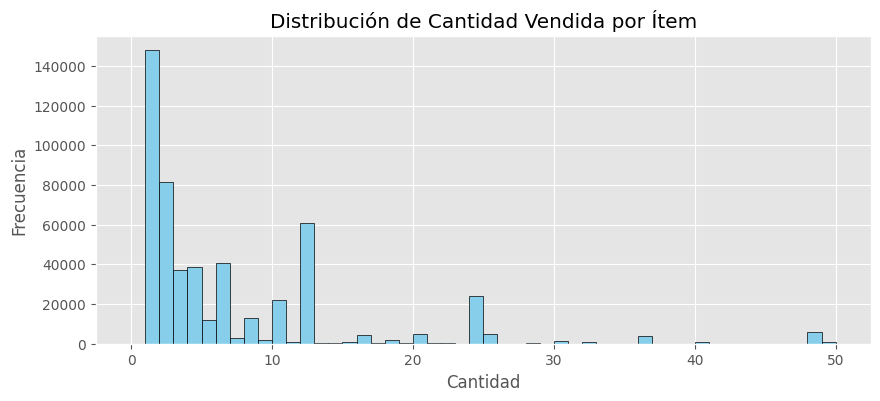

In [45]:

# Histograma para Quantity
plt.figure(figsize=(10, 4))
plt.hist(df['Quantity'], bins=50, range=(0, 50), color='skyblue', edgecolor='black')
plt.title('Distribución de Cantidad Vendida por Ítem')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

Se observa que mayoritariamente se hacen pocas transacciones con pocas unidades (compras minoristas), tambien se observa un sesgo a la derecha ya que existe una cola larga hacia valores altos. Siendo el valor más atipico pedidos de 50 o más unidades

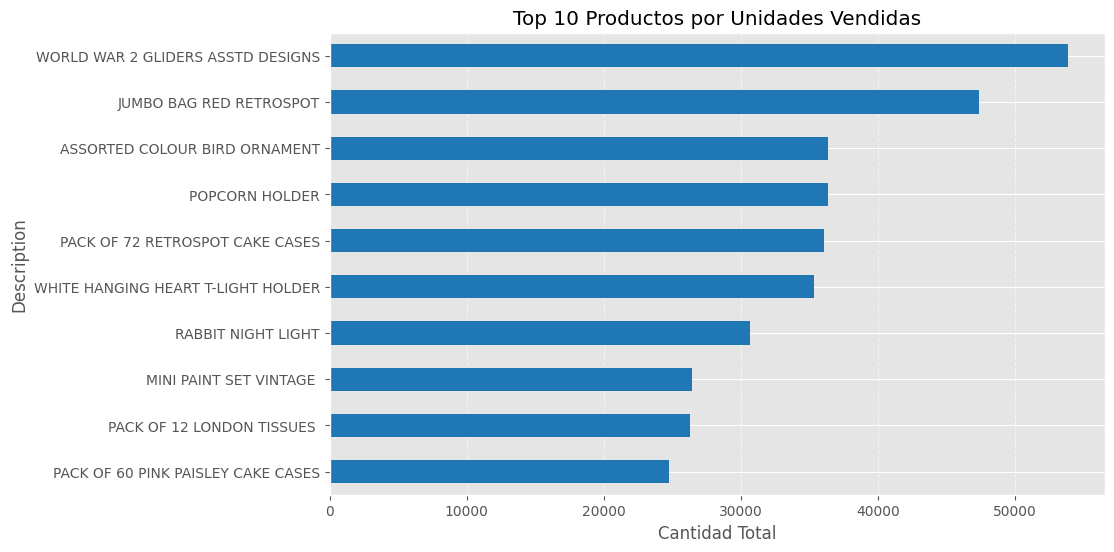

In [25]:
# Top 10 productos por cantidad
top_10_cantidad = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_cantidad.sort_values().plot(kind='barh', color='#1f77b4')
plt.title('Top 10 Productos por Unidades Vendidas')
plt.xlabel('Cantidad Total')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Se observa que entre los 10 productos más vendidos, el que más vendio por cantidad de unidades es el world war 2 gliders asstd designs superando las 50.000 unidades

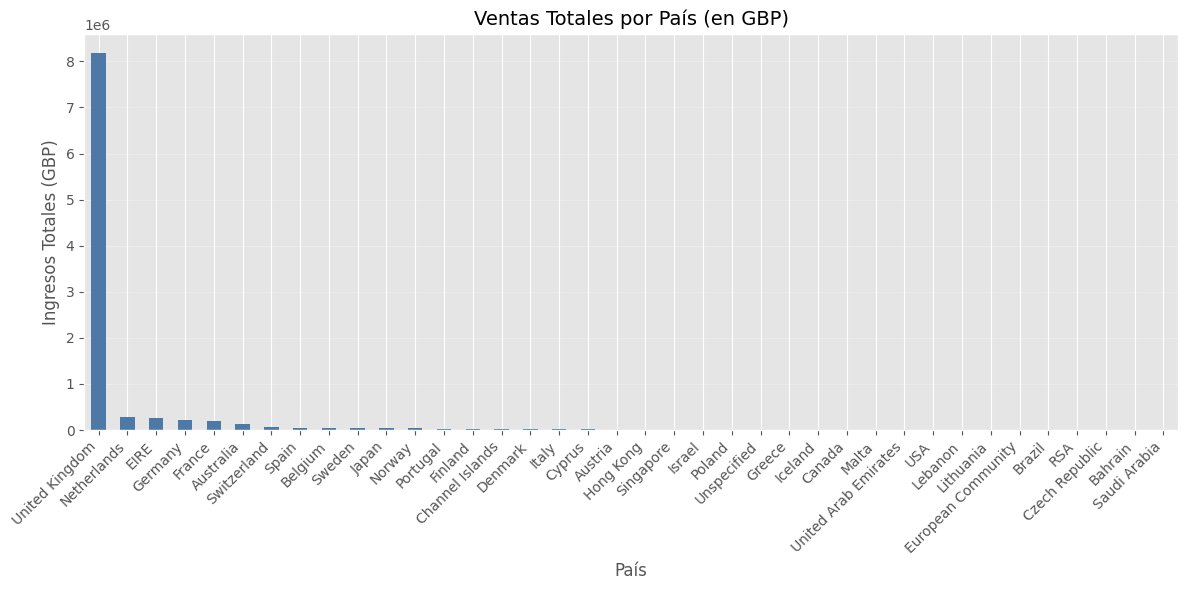

In [27]:
# Calcular ventas totales por país (en cantidad e ingresos)
ventas_por_pais = df.groupby('Country').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('Total_Item', 'sum')  # Asumiendo que ya creaste la columna Total_Item
).sort_values('Total_Revenue', ascending=False)

# Gráfico de barras (ingresos)
plt.figure(figsize=(12, 6))
ventas_por_pais['Total_Revenue'].plot(kind='bar', color='#4e79a7')
plt.title('Ventas Totales por País (en GBP)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Ingresos Totales (GBP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()